# working with real data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
data=pd.read_csv("Dataset Question2.csv",header=None,names=["x1","x2","x3","x4","y"])

In [3]:
data.head()

,x1,x2,x3,x4,y
0,-0.91718,9.988400,1.1804,-5.22630,0
1,0.72252,-0.053811,5.6703,-1.35090,0
2,1.09870,0.639400,5.9890,-0.58277,0
3,0.57060,-0.024800,1.2421,-0.56210,0
4,-0.60254,1.723700,-2.1501,-0.77027,1


In [4]:
inputs=[]

In [5]:
for i in range(data.shape[0]):
    inputs.append([data["x1"][i],data["x2"][i],data["x3"][i],data["x4"][i]])

In [6]:
labels=data["y"]

splitting of data set into training and testing data

In [7]:
inputs_train,inputs_test,labels_train,labels_test=train_test_split(inputs,labels,test_size=.2)

Normalized data

In [8]:

norm_input= preprocessing.normalize(inputs)
#norm_input

In [9]:
weights=np.random.randn(5)
error=0
iteration=0
loss=0
losses=[]
correct=[]
def predict(input):
        summation = np.dot(input,weights[1:]) + weights[0]
        if summation >= 0:
              activation = 1
        else:
              activation = 0            
        return activation
    
def train(inputs_train, labels_train):
    
    global iteration
    for _ in range(1000):
        global loss
        loss=0
        for input, label in zip(inputs_train, labels_train):
            prediction =predict(input)
            weights[1:] +=np.dot((int(label) - prediction) ,input)
            if(label!=prediction):
                loss+=1
            weights[0] += (int(label) - prediction)
        losses.append(loss)
        correct.append(len(inputs_train)-loss)
        iteration=iteration+1
    
train(inputs_train,labels_train)
print(weights)

[ 163.16894575 -202.96528884 -110.68498288 -136.02050399  -12.75428961]


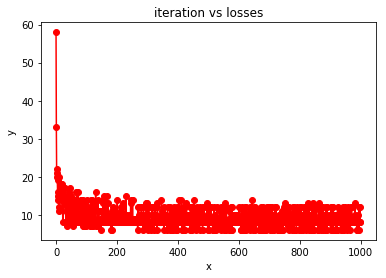

In [10]:
iteration=[i for i in range(1000)]
plt.plot(iteration,losses,'-or')
plt.title('iteration vs losses')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


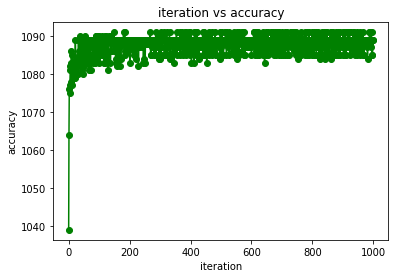

In [11]:
iteration=[i for i in range(1000)]
plt.plot(iteration,correct,'-og')
plt.title('iteration vs accuracy')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()

# test data

In [12]:
px=[]
py=[]
pz=[]
pz1=[]
nx=[]
ny=[]
nz=[]
nz1=[]
predicted_lbl=[]
def test(cord):
    for x_y in (cord):
        pred=predict(x_y)
        predicted_lbl.append(pred)
        if(pred==1):
            px.append(x_y[0])
            py.append(x_y[1])
            pz.append(x_y[2])
            pz1.append(x_y[3])
        else:
            nx.append(x_y[0])
            ny.append(x_y[1])
            nz.append(x_y[2])
            nz1.append(x_y[3])
        
            
test(inputs_test)

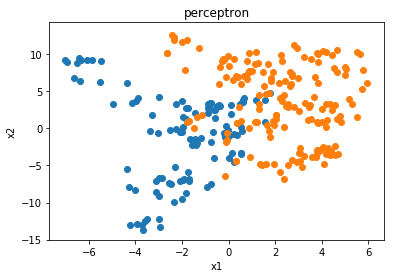

In [13]:
plt.scatter(px, py,label="1")
plt.scatter(nx, ny,label="0")
plt.title('perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [14]:
print(confusion_matrix(labels_test,predicted_lbl))

[[161   2]
 [  4 108]]


In [15]:
print('test_accuracy:',metrics.accuracy_score(labels_test,predicted_lbl))

test_accuracy: 0.9781818181818182


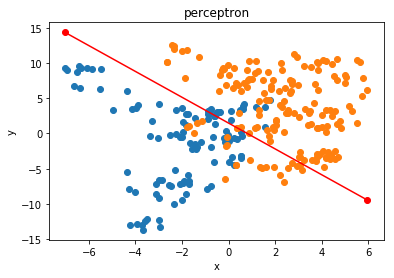

In [16]:
minx = min(min(px),min(nx))
maxx = max(max(px),max(nx))

miny = - (weights[0] + weights[1] * minx) / weights[2]
maxy = - (weights[0] + weights[1] * maxx) / weights[2]

plt.scatter(px, py,label="1")
plt.scatter(nx, ny,label="0")
plt.title('perceptron')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([minx, maxx], [miny, maxy], 'or-')
plt.show()

# Normalized data

In [17]:
norm_train,norm_test,norm_train_label,norm_test_label=train_test_split(norm_input,labels,test_size=.2)

In [18]:
weights=np.random.randn(5)
error=0
iteration=0
loss=0
losses=[]
correct=[]
def predict(input):
        summation = np.dot(input,weights[1:]) + weights[0]
        if summation >= 0:
              activation = 1
        else:
              activation = 0            
        return activation
    
def train(inputs_train, labels_train):
    
    global iteration
    for _ in range(1000):
        global loss
        loss=0
        for input, label in zip(inputs_train, labels_train):
            prediction =predict(input)
            weights[1:] +=np.dot((int(label) - prediction) ,input)
            if(label!=prediction):
                loss+=1
            weights[0] += (int(label) - prediction)
        losses.append(loss)
        correct.append(len(inputs_train)-loss)
        iteration=iteration+1
    
train(norm_train,norm_train_label)
print(weights)

[  7.20647191 -22.12795404 -13.09927252 -20.57910826  10.07643548]


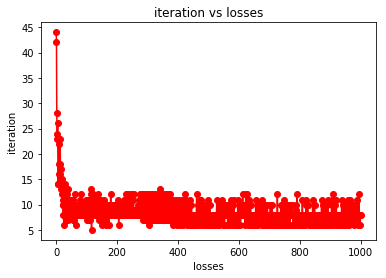

In [19]:
iteration=[i for i in range(1000)]
plt.plot(iteration,losses,'-or')
plt.title('iteration vs losses')
plt.xlabel('losses')
plt.ylabel('iteration')
plt.show()

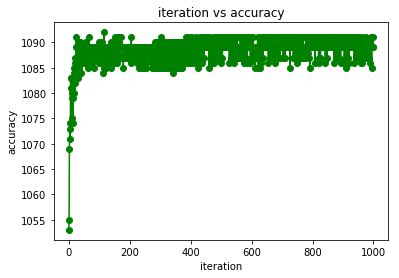

In [20]:
iteration=[i for i in range(1000)]
plt.plot(iteration,correct,'-og')
plt.title('iteration vs accuracy')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show()

In [21]:
px=[]
py=[]
pz=[]
pz1=[]
nx=[]
ny=[]
nz=[]
nz1=[]
predicted_lbl=[]
def test(cord):
    for x_y in (cord):
        pred=predict(x_y)
        predicted_lbl.append(pred)
        if(pred==1):
            px.append(x_y[0])
            py.append(x_y[1])
            pz.append(x_y[2])
            pz1.append(x_y[3])
        else:
            nx.append(x_y[0])
            ny.append(x_y[1])
            nz.append(x_y[2])
            nz1.append(x_y[3])
        
            
test(norm_test)

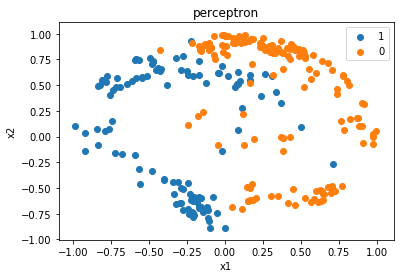

In [22]:
plt.scatter(px, py,label="1")
plt.scatter(nx, ny,label="0")
plt.title('perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [23]:
print(confusion_matrix(norm_test_label,predicted_lbl))

[[155   1]
 [  1 118]]


In [24]:
print('test_accuracy:',metrics.accuracy_score(norm_test_label,predicted_lbl))

test_accuracy: 0.9927272727272727


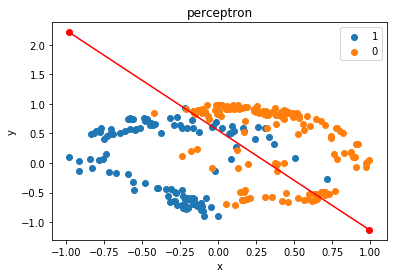

In [25]:
minx = min(min(px),min(nx))
maxx = max(max(px),max(nx))

miny = - (weights[0] + weights[1] * minx) / weights[2]
maxy = - (weights[0] + weights[1] * maxx) / weights[2]

plt.scatter(px, py,label="1")
plt.scatter(nx, ny,label="0")
plt.legend()
plt.title('perceptron')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([minx, maxx], [miny, maxy], 'or-')
plt.show()

# Observation

acccuracy increases with increase in iteration

loss and accuracy are inversely proportional

it is better to work with normalized data because it has better closeness of points easy to get a separator